In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

# Load Data (Assuming it's a CSV - replace with actual source)
data = pd.read_csv("travel_data.csv")
data.head()


,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [237]:
data['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

In [238]:
data.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,1.005880e+06,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.661565,2.712245,0.793878,13.817432
std,3.394964e+03,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660504,1.080887,0.851823,9.070657
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,4.000000,3.000000,270.000000


In [239]:
data.shape

(11760, 17)

In [240]:
data.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [241]:
data.dtypes

,0
UserID,int64
Taken_product,object
Yearly_avg_view_on_travel_page,float64
preferred_device,object
total_likes_on_outstation_checkin_given,float64
yearly_avg_Outstation_checkins,object
member_in_family,object
preferred_location_type,object
Yearly_avg_comment_on_travel_page,float64
total_likes_on_outofstation_checkin_received,int64


In [242]:
na_values = data.isna().sum()
na_values

,0
UserID,0
Taken_product,0
Yearly_avg_view_on_travel_page,581
preferred_device,53
total_likes_on_outstation_checkin_given,381
yearly_avg_Outstation_checkins,75
member_in_family,0
preferred_location_type,31
Yearly_avg_comment_on_travel_page,206
total_likes_on_outofstation_checkin_received,0


In [243]:
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].fillna(data[col].mean())


na_values

,0
UserID,0
Taken_product,0
Yearly_avg_view_on_travel_page,581
preferred_device,53
total_likes_on_outstation_checkin_given,381
yearly_avg_Outstation_checkins,75
member_in_family,0
preferred_location_type,31
Yearly_avg_comment_on_travel_page,206
total_likes_on_outofstation_checkin_received,0


In [244]:
data= data.dropna()
data.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [245]:
missing_values= data.isnull().sum()
missing_values

,0
UserID,0
Taken_product,0
Yearly_avg_view_on_travel_page,0
preferred_device,0
total_likes_on_outstation_checkin_given,0
yearly_avg_Outstation_checkins,0
member_in_family,0
preferred_location_type,0
Yearly_avg_comment_on_travel_page,0
total_likes_on_outofstation_checkin_received,0


In [246]:
duplicate_values= data.duplicated().sum()
duplicate_values

np.int64(0)

In [247]:
# # Ensure 'Buy_ticket' is present and properly typed
# if 'Taken_product' in data.columns:
#     data['Taken_product'] = data['Taken_product'].astype(int)

#     # Visualize class distribution
#     sns.countplot(x='Taken_product', data=data)
#     plt.title('Class Distribution of Target')
#     plt.show()

Could not plot yearly_avg_Outstation_checkins: The x variable is categorical, but one of ['numeric', 'datetime'] is required


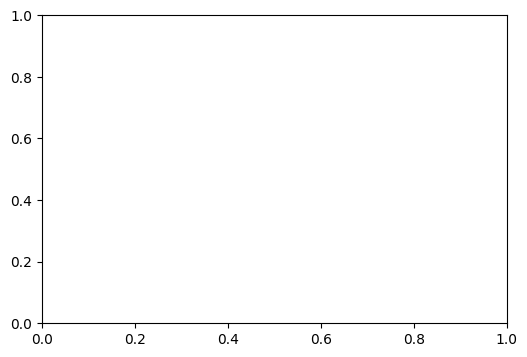

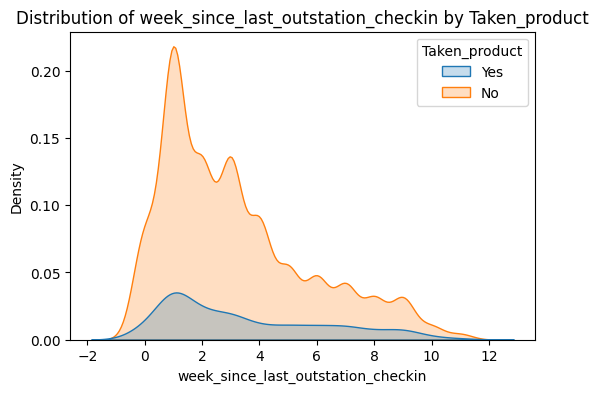

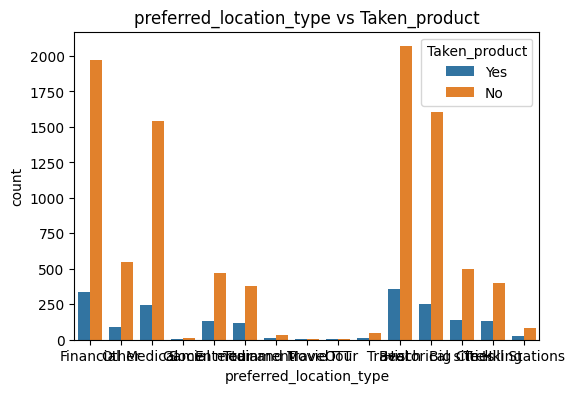

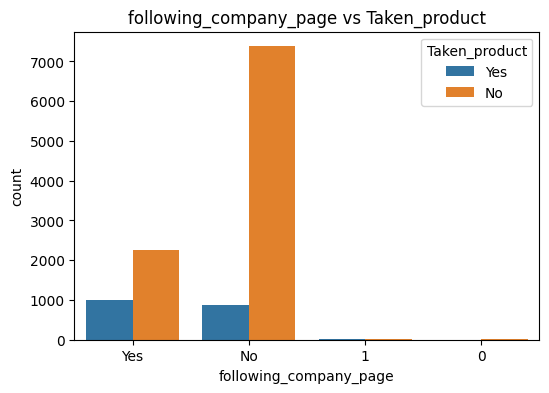

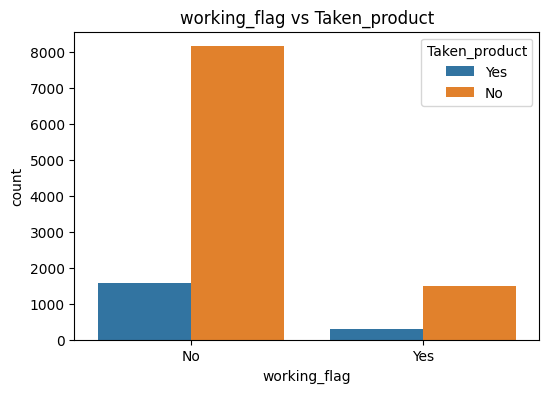

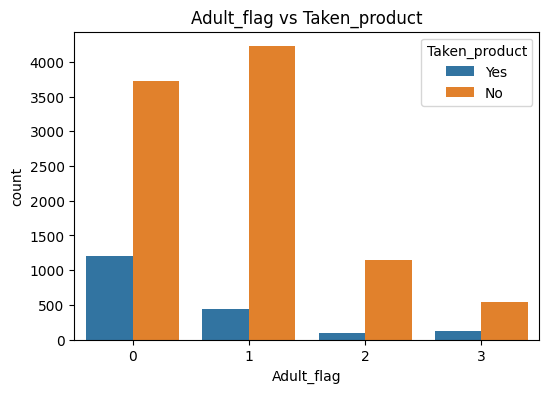

In [248]:
 # Distribution of numeric features by Buy_ticket
for col in ['Daily_Avg_mins_spend_on_travelling_page', 'yearly_avg_Outstation_checkins', 'week_since_last_outstation_checkin']:
        if col in data.columns:
            plt.figure(figsize=(6, 4))
            try:
                sns.kdeplot(data=data, x=col, hue='Taken_product', fill=True)
                plt.title(f'Distribution of {col} by Taken_product')
                plt.show()
            except Exception as e:
                print(f"Could not plot {col}: {e}")

    # Countplots for categorical features
for col in ['preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']:
        if col in data.columns:
            plt.figure(figsize=(6, 4))
            try:
                sns.countplot(x=col, hue='Taken_product', data=data)
                plt.title(f'{col} vs Taken_product')
                plt.show()
            except Exception as e:
                print(f"Could not plot {col}: {e}")


In [249]:
# Convert categorical Yes/No to binary
data['following_company_page'] = data['following_company_page'].map({'Yes': 1, 'No': 0})
data['working_flag'] = data['working_flag'].map({'Yes': 1, 'No': 0})
data['Adult_flag'] = data['Adult_flag'].map({'Yes': 1, 'No': 0})
data['Taken_product'] = data['Taken_product'].map({'Yes': 1, 'No': 0})
data.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,1,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,1.0,11,0,1,NaN,8
1,1000002,0,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,0.0,23,1,4,NaN,10
2,1000003,1,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,1.0,15,0,2,NaN,7
3,1000004,0,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,1.0,11,0,3,NaN,8
4,1000005,0,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,0.0,12,0,4,NaN,6


In [250]:
# Label Encode 'preferred_location_type'
le = LabelEncoder()
data['preferred_location_type'] = le.fit_transform(data['preferred_location_type'])


In [251]:
data['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

In [252]:
data = data.drop("UserID", axis=1)

# Split by device
laptop_df = data[data['preferred_device'] == 'Laptop'].drop("preferred_device", axis=1,inplace=True)
mobile_df = data[data['preferred_device'] != 'Laptop'].drop("preferred_device", axis=1)
data.head()


/tmp/ipython-input-252-72582651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df = data[data['preferred_device'] == 'Laptop'].drop("preferred_device", axis=1,inplace=True)


,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,iOS and Android,38570.0,1,2,3,94.0,5993,8,1.0,11,0,1,NaN,8
1,0,367.0,iOS,9765.0,1,1,3,61.0,5130,1,0.0,23,1,4,NaN,10
2,1,277.0,iOS and Android,48055.0,1,2,10,92.0,2090,6,1.0,15,0,2,NaN,7
3,0,247.0,iOS,48720.0,1,4,3,56.0,2909,1,1.0,11,0,3,NaN,8
4,0,202.0,iOS and Android,20685.0,1,1,7,40.0,3468,9,0.0,12,0,4,NaN,6


In [253]:
data['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

/tmp/ipython-input-254-1856666909.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mean(), inplace=True)
/tmp/ipython-input-254-1856666909.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2411
           1       1.00      0.88      0.94       464

    accuracy                           0.98      2875
   macro avg       0.99      0.94      0.96      2875
weighted avg       0.98      0.98      0.98      2875


Confusion Matrix:
[[2411    0]
 [  56  408]]

ROC AUC Score:
0.9994498097798882


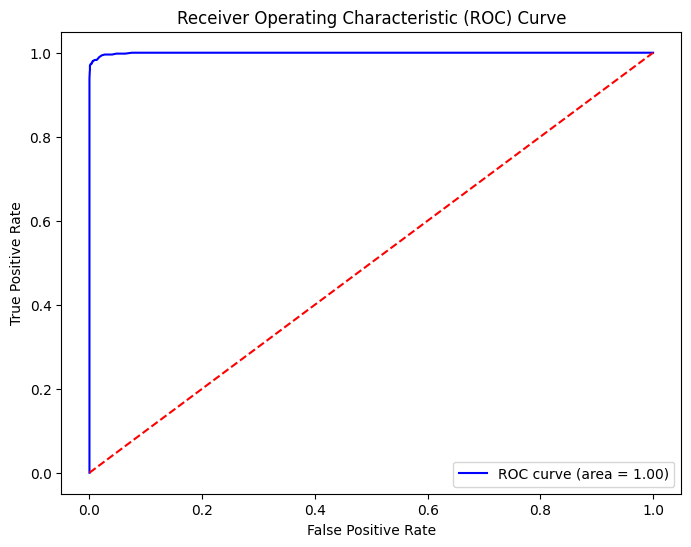

In [254]:
# prompt: use label encoder method to split the dataset and train a model to predict whether the customer is going to adopt the tourism package based on a social media campaign.

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd

# Prepare data for modeling
X = data.drop('Taken_product', axis=1)
y = data['Taken_product']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Drop the 'preferred_device' column as it is a string column and not used for scaling
X_train = X_train.drop('preferred_device', axis=1)
X_test = X_test.drop('preferred_device', axis=1)

# Convert string representations of numbers to numeric in 'member_in_family'
X_train['member_in_family'] = X_train['member_in_family'].replace({'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5})
X_test['member_in_family'] = X_test['member_in_family'].replace({'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5})


# Scale numerical features (optional but recommended for some models)
# Numerical features: 'Daily_Avg_mins_spend_on_travelling_page', 'yearly_avg_Outstation_checkins', 'week_since_last_outstation_checkin'
numerical_features = ['Daily_Avg_mins_spend_on_traveling_page', 'yearly_avg_Outstation_checkins', 'week_since_last_outstation_checkin', 'member_in_family']

# Check if numerical features exist in the training data before scaling
present_numerical_features = [col for col in numerical_features if col in X_train.columns]

if present_numerical_features:
    # Identify non-numeric values in the numerical columns
    for col in present_numerical_features:
        # Explicitly replace '*' with empty string and then convert to numeric, coercing errors to NaN
        X_train[col] = X_train[col].astype(str).str.replace('*', '')
        X_test[col] = X_test[col].astype(str).str.replace('*', '')

        # Convert to numeric, coercing errors to NaN
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

        # Fill NaN with the mean of the training data
        X_train[col].fillna(X_train[col].mean(), inplace=True)
        X_test[col].fillna(X_test[col].mean(), inplace=True)


    scaler = StandardScaler()
    X_train[present_numerical_features] = scaler.fit_transform(X_train[present_numerical_features])
    X_test[present_numerical_features] = scaler.transform(X_test[present_numerical_features])
else:
    print("Numerical features not found in the dataframe for scaling.")


# Train a model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# You can also train other models like XGBoost
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_y_pred = xgb_model.predict(X_test)
# print("\nXGBoost Classification Report:")
# print(classification_report(y_test, xgb_y_pred))

In [ ]:
# prompt: if i have a dataset with details of the social media campaign(s) alone, will the model predict the  customer's action? give code to upload dataset and give the result

import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

# Upload your file
uploaded = files.upload()

# Assuming you uploaded a file named 'travel_data.csv'
file_name = "travel_data.csv"

if file_name in uploaded:
  # Load the dataset
  data = pd.read_csv(file_name)
  print(f"Successfully loaded {file_name}")

  # The rest of your existing code for data preprocessing, model training, and evaluation follows:
  # (Copy and paste the relevant parts from your original code)

  # Example start of the rest of your code:
  data.head()

  data['preferred_device'].unique()
  data.describe()
  data.shape
  data.columns
  data.dtypes
  na_values = data.isna().sum()
  na_values
  for col in data.columns:
      if pd.api.types.is_numeric_dtype(data[col]):
          data[col] = data[col].fillna(data[col].mean())

  na_values
  data= data.dropna()
  data.head()
  missing_values= data.isnull().sum()
  missing_values
  duplicate_values= data.duplicated().sum()
  duplicate_values
  # Ensure 'Buy_ticket' is present and properly typed
  if 'Taken_product' in data.columns:
      data['Taken_product'] = data['Taken_product'].astype(int)

      # Visualize class distribution
      sns.countplot(x='Taken_product', data=data)
      plt.title('Class Distribution of Target')
      plt.show()
   # Distribution of numeric features by Buy_ticket
  for col in ['Daily_Avg_mins_spend_on_travelling_page', 'yearly_avg_Outstation_checkins', 'week_since_last_outstation_checkin']:
          if col in data.columns:
              plt.figure(figsize=(6, 4))
              try:
                  sns.kdeplot(data=data, x=col, hue='Taken_product', fill=True)
                  plt.title(f'Distribution of {col} by Taken_product')
                  plt.show()
              except Exception as e:
                  print(f"Could not plot {col}: {e}")

      # Countplots for categorical features
  for col in ['preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']:
          if col in data.columns:
              plt.figure(figsize=(6, 4))
              try:
                  sns.countplot(x=col, hue='Taken_product', data=data)
                  plt.title(f'{col} vs Taken_product')
                  plt.show()
              except Exception as e:
                  print(f"Could not plot {col}: {e}")

  # Convert categorical Yes/No to binary
  data['following_company_page'] = data['following_company_page'].map({'Yes': 1, 'No': 0})
  data['working_flag'] = data['working_flag'].map({'Yes': 1, 'No': 0})
  data['Adult_flag'] = data['Adult_flag'].map({'Yes': 1, 'No': 0})
  data['Taken_product'] = data['Taken_product'].map({'Yes': 1, 'No': 0})
  data.head()
  # Label Encode 'preferred_location_type'
  le = LabelEncoder()
  data['preferred_location_type'] = le.fit_transform(data['preferred_location_type'])

  data['preferred_device'].unique()
  data = data.drop("UserID", axis=1)

  # Split by device
  # Note: The inplace=True on drop will modify the DataFrame in place,
  # meaning laptop_df and mobile_df might not contain the expected data.
  # Consider removing inplace=True if you intend to keep separate dataframes.
  # For the purpose of the main model training below, dropping from 'data' is needed.
  if 'preferred_device' in data.columns:
      data = data.drop("preferred_device", axis=1)
  # If you still want laptop_df and mobile_df for separate analysis:
  # laptop_df = data[data['preferred_device'] == 'Laptop'].copy() # Use .copy() to avoid SettingWithCopyWarning
  # mobile_df = data[data['preferred_device'] != 'Laptop'].copy()
  # if 'preferred_device' in laptop_df.columns:
  #     laptop_df.drop("preferred_device", axis=1, inplace=True)
  # if 'preferred_device' in mobile_df.columns:
  #     mobile_df.drop("preferred_device", axis=1, inplace=True)


  # Prepare data for modeling
  X = data.drop('Taken_product', axis=1)
  y = data['Taken_product']

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


  # Convert string representations of numbers to numeric in 'member_in_family'
  # Check if 'member_in_family' exists before trying to replace
  if 'member_in_family' in X_train.columns:
      X_train['member_in_family'] = X_train['member_in_family'].replace({'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5})
      X_test['member_in_family'] = X_test['member_in_family'].replace({'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5})


  # Scale numerical features (optional but recommended for some models)
  # Numerical features: 'Daily_Avg_mins_spend_on_travelling_page', 'yearly_avg_Outstation_checkins', 'week_since_last_outstation_checkin'
  # Corrected feature name based on the original code's usage:
  numerical_features = ['Daily_Avg_mins_spend_on_travelling_page', 'yearly_avg_Outstation_checkins', 'week_since_last_outstation_checkin', 'member_in_family']


  # Check if numerical features exist in the training data before scaling
  present_numerical_features = [col for col in numerical_features if col in X_train.columns]

  if present_numerical_features:
      # Identify non-numeric values in the numerical columns
      for col in present_numerical_features:
          # Explicitly replace '*' with empty string and then convert to numeric, coercing errors to NaN
          # Ensure the column is treated as string first
          X_train[col] = X_train[col].astype(str).str.replace('*', '', regex=False) # Use regex=False for literal '*'
          X_test[col] = X_test[col].astype(str).str.replace('*', '', regex=False)

          # Convert to numeric, coercing errors to NaN
          X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
          X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

          # Fill NaN with the mean of the training data
          # Check if the column has NaN values before filling
          if X_train[col].isnull().any():
              mean_val_train = X_train[col].mean()
              X_train[col].fillna(mean_val_train, inplace=True)
          if X_test[col].isnull().any():
              # Use the mean from the training data for filling test data
              if 'mean_val_train' in locals(): # Check if mean_val_train was calculated
                  X_test[col].fillna(mean_val_train, inplace=True)
              else: # Fallback if training data was empty or had no NaNs
                   X_test[col].fillna(X_test[col].mean(), inplace=True)


      scaler = StandardScaler()
      X_train[present_numerical_features] = scaler.fit_transform(X_train[present_numerical_features])
      X_test[present_numerical_features] = scaler.transform(X_test[present_numerical_features])
  else:
      print("Numerical features not found in the dataframe for scaling.")


  # Train a model (e.g., RandomForestClassifier)
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Make predictions
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  # Evaluate the model
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

  print("\nConfusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

  print("\nROC AUC Score:")
  print(roc_auc_score(y_test, y_pred_proba))

  # Plot ROC Curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

else:
  print(f"File '{file_name}' not found in the uploaded files.")



# Task
Perform cross-validation on the training data using the previously defined RandomForestClassifier model and evaluate the results.

## Import necessary libraries

### Subtask:
Import `cross_val_score` from `sklearn.model_selection`.


**Reasoning**:
Import the `cross_val_score` function from the `sklearn.model_selection` module to perform cross-validation.



In [256]:
from sklearn.model_selection import cross_val_score

## Define the model

### Subtask:
Define the model


**Reasoning**:
Define the RandomForestClassifier model using the previously defined model.



In [257]:
# The model is already defined in a previous cell:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# No code is needed in this cell as the model is already available in the environment.

## Perform cross-validation

### Subtask:
Use `cross_val_score` to perform k-fold cross-validation on the training data.


**Reasoning**:
Perform k-fold cross-validation on the training data using the defined model and store the scores.



In [258]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

## Evaluate the cross-validation results

### Subtask:
Display the mean and standard deviation of the cross-validation scores.


**Reasoning**:
Calculate and print the mean and standard deviation of the cross-validation scores.



In [259]:
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Mean cross-validation score: {mean_cv_score:.4f}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.4f}")

Mean cross-validation score: 0.9689
Standard deviation of cross-validation scores: 0.0020


## Summary:

### Data Analysis Key Findings

*   The mean cross-validation score for the `RandomForestClassifier` model on the training data is approximately 0.9689.
*   The standard deviation of the cross-validation scores is approximately 0.0020, indicating a low variability in performance across the different folds.

### Insights or Next Steps

*   The high mean cross-validation score suggests that the model is performing well on the training data and generalizes effectively across different subsets of the training data.
*   The low standard deviation indicates that the model's performance is consistent, which is a positive sign for its reliability. The next step would be to evaluate the model's performance on the unseen test data to get a final assessment of its generalization ability.


In [260]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.9805
